In [121]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv']


In [122]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
combine = [train_df, test_df]

In [123]:
print(train_df.columns.values)

['id' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P']


In [124]:
train_df.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,b,18.42,10.415,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1
1,2,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0,1
2,3,b,30.17,1.085,y,p,c,v,0.040,f,f,0,f,g,170.0,179,1
3,4,b,22.67,2.540,y,p,c,h,2.585,t,f,0,f,g,0.0,0,0
4,5,a,36.00,1.000,u,g,c,v,2.000,t,t,11,f,g,0.0,456,0


In [125]:
train_df.tail()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
547,548,b,43.25,3.000,u,g,q,h,6.00,t,t,11,f,g,80.0,0,0
548,549,b,33.17,1.000,u,g,x,v,0.75,t,t,7,t,g,340.0,4071,0
549,550,a,41.33,1.000,u,g,i,bb,2.25,t,f,0,t,g,0.0,300,0
550,551,a,30.42,1.375,u,g,w,h,0.04,f,t,3,f,g,0.0,33,1
551,552,b,47.17,5.835,u,g,w,v,5.50,f,f,0,f,g,465.0,150,1


In [126]:
train_df.shape

(552, 17)

In [127]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 17 columns):
id    552 non-null int64
A     544 non-null object
B     543 non-null float64
C     552 non-null float64
D     547 non-null object
E     547 non-null object
F     545 non-null object
G     545 non-null object
H     552 non-null float64
I     552 non-null object
J     552 non-null object
K     552 non-null int64
L     552 non-null object
M     552 non-null object
N     541 non-null float64
O     552 non-null int64
P     552 non-null int64
dtypes: float64(4), int64(4), object(9)
memory usage: 73.4+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 16 columns):
id    138 non-null int64
A     134 non-null object
B     135 non-null float64
C     138 non-null float64
D     137 non-null object
E     137 non-null object
F     136 non-null object
G     136 non-null object
H     138 non-null float64
I     13

In [128]:
train_df.describe()

,id,B,C,H,K,N,O,P
count,552.000000,543.000000,552.000000,552.000000,552.000000,541.000000,552.000000,552.000000
mean,276.500000,31.364899,4.780136,2.259176,2.318841,175.162662,1087.576087,0.552536
std,159.492947,11.873665,4.938454,3.442564,4.297867,154.873746,5758.841945,0.497683
min,1.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,138.750000,22.500000,1.000000,0.165000,0.000000,60.000000,0.000000,0.000000
50%,276.500000,28.170000,2.750000,1.000000,0.000000,152.000000,3.500000,1.000000
75%,414.250000,37.665000,7.561250,2.750000,3.000000,268.000000,364.750000,1.000000
max,552.000000,80.250000,28.000000,28.500000,40.000000,1160.000000,100000.000000,1.000000


In [129]:
train_df.describe(include=['O'])

,A,D,E,F,G,I,J,L,M
count,544,547,547,545,545,552,552,552,552
unique,2,3,3,14,9,2,2,2,3
top,b,u,g,c,v,t,f,f,g
freq,374,416,416,115,319,286,319,298,497


In [130]:
train_df.isnull().sum()

id     0
A      8
B      9
C      0
D      5
E      5
F      7
G      7
H      0
I      0
J      0
K      0
L      0
M      0
N     11
O      0
P      0
dtype: int64

In [131]:
test_df.isnull().sum()

id    0
A     4
B     3
C     0
D     1
E     1
F     2
G     2
H     0
I     0
J     0
K     0
L     0
M     0
N     2
O     0
dtype: int64

In [132]:
train_df = train_df.dropna(axis=0)
test_df = test_df.dropna(axis=0)

In [133]:
train_df.isnull().sum()

id    0
A     0
B     0
C     0
D     0
E     0
F     0
G     0
H     0
I     0
J     0
K     0
L     0
M     0
N     0
O     0
P     0
dtype: int64

In [134]:
test_df.isnull().sum()

id    0
A     0
B     0
C     0
D     0
E     0
F     0
G     0
H     0
I     0
J     0
K     0
L     0
M     0
N     0
O     0
dtype: int64

In [135]:
combine = [train_df, test_df]

In [136]:
train_df[["A", "P"]].groupby(['A'], as_index=False).mean().sort_values(by='P', ascending=False)

,A,P
1,b,0.557103
0,a,0.515152


In [137]:
train_df[["D", "P"]].groupby(['D'], as_index=False).mean().sort_values(by='P', ascending=False)

,D,P
2,y,0.677686
1,u,0.506234
0,l,0.000000


In [138]:
train_df[["E", "P"]].groupby(['E'], as_index=False).mean().sort_values(by='P', ascending=False)

,E,P
2,p,0.677686
0,g,0.506234
1,gg,0.000000


In [139]:
train_df[["F", "P"]].groupby(['F'], as_index=False).mean().sort_values(by='F', ascending=False)

,F,P
13,x,0.172414
12,w,0.510204
11,r,0.000000
10,q,0.343750
9,m,0.548387
8,k,0.729730
7,j,0.625000
6,i,0.720930
5,ff,0.853659
4,e,0.388889


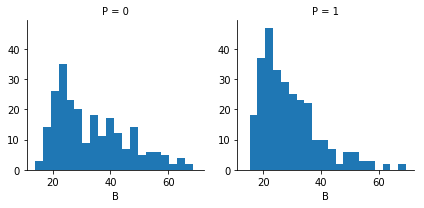

In [140]:
g = sns.FacetGrid(train_df, col='P')
g.map(plt.hist, 'B', bins=20)

In [141]:
train_df['A'].value_counts()

b    359
a    165
Name: A, dtype: int64

In [142]:
for dataset in combine:
    dataset['A'] = dataset['A'].map( {'a': 1, 'b': 0} ).astype(int)

train_df.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,0,18.42,10.415,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1
1,2,1,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0,1
2,3,0,30.17,1.085,y,p,c,v,0.040,f,f,0,f,g,170.0,179,1
3,4,0,22.67,2.540,y,p,c,h,2.585,t,f,0,f,g,0.0,0,0
4,5,1,36.00,1.000,u,g,c,v,2.000,t,t,11,f,g,0.0,456,0


In [143]:
train_df['D'].value_counts()

u    401
y    121
l      2
Name: D, dtype: int64

In [144]:
for dataset in combine:
    dataset['D'] = dataset['D'].map( {'u': 2, 'y': 1, 'l': 0} ).astype(int)

train_df.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,0,18.42,10.415,1,p,aa,v,0.125,t,f,0,f,g,120.0,375,1
1,2,1,21.75,11.750,2,g,c,v,0.250,f,f,0,t,g,180.0,0,1
2,3,0,30.17,1.085,1,p,c,v,0.040,f,f,0,f,g,170.0,179,1
3,4,0,22.67,2.540,1,p,c,h,2.585,t,f,0,f,g,0.0,0,0
4,5,1,36.00,1.000,2,g,c,v,2.000,t,t,11,f,g,0.0,456,0


In [145]:
train_df['E'].value_counts()

g     401
p     121
gg      2
Name: E, dtype: int64

In [146]:
for dataset in combine:
    dataset['E'] = dataset['E'].map( {'g': 2, 'p': 1, 'gg': 0} ).astype(int)

train_df.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,0,18.42,10.415,1,1,aa,v,0.125,t,f,0,f,g,120.0,375,1
1,2,1,21.75,11.750,2,2,c,v,0.250,f,f,0,t,g,180.0,0,1
2,3,0,30.17,1.085,1,1,c,v,0.040,f,f,0,f,g,170.0,179,1
3,4,0,22.67,2.540,1,1,c,h,2.585,t,f,0,f,g,0.0,0,0
4,5,1,36.00,1.000,2,2,c,v,2.000,t,t,11,f,g,0.0,456,0


In [147]:
train_df['F'].value_counts()

c     112
q      64
w      49
i      43
aa     42
ff     41
k      37
m      31
x      29
cc     28
d      21
e      18
j       8
r       1
Name: F, dtype: int64

In [148]:
for dataset in combine:
    dataset['F'] = dataset['F'].map( {'c': 14, 'q': 13, 'w': 12, 'i': 11, 'aa': 10, 'ff': 9,'k': 8,'m': 7,'x': 6,
                                     'cc': 5,'d': 4,'e': 3,'e': 2,'j': 1,'r': 0} ).astype(int)

train_df.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,0,18.42,10.415,1,1,10,v,0.125,t,f,0,f,g,120.0,375,1
1,2,1,21.75,11.750,2,2,14,v,0.250,f,f,0,t,g,180.0,0,1
2,3,0,30.17,1.085,1,1,14,v,0.040,f,f,0,f,g,170.0,179,1
3,4,0,22.67,2.540,1,1,14,h,2.585,t,f,0,f,g,0.0,0,0
4,5,1,36.00,1.000,2,2,14,v,2.000,t,t,11,f,g,0.0,456,0


In [149]:
train_df['G'].value_counts()

v     306
h     113
ff     44
bb     41
z       7
j       6
dd      3
o       2
n       2
Name: G, dtype: int64

In [150]:
for dataset in combine:
    dataset['G'] = dataset['G'].map( {'v': 8, 'h': 7, 'ff': 6,'bb': 5,'z': 4,'j': 3,'dd': 2,'o': 1,'n': 0} ).astype(int)

train_df.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,0,18.42,10.415,1,1,10,8,0.125,t,f,0,f,g,120.0,375,1
1,2,1,21.75,11.750,2,2,14,8,0.250,f,f,0,t,g,180.0,0,1
2,3,0,30.17,1.085,1,1,14,8,0.040,f,f,0,f,g,170.0,179,1
3,4,0,22.67,2.540,1,1,14,7,2.585,t,f,0,f,g,0.0,0,0
4,5,1,36.00,1.000,2,2,14,8,2.000,t,t,11,f,g,0.0,456,0


In [151]:
train_df['I'].value_counts()

t    277
f    247
Name: I, dtype: int64

In [152]:
for dataset in combine:
    dataset['I'] = dataset['I'].map( {'t': 1, 'f': 0} ).astype(int)

train_df.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,0,18.42,10.415,1,1,10,8,0.125,1,f,0,f,g,120.0,375,1
1,2,1,21.75,11.750,2,2,14,8,0.250,0,f,0,t,g,180.0,0,1
2,3,0,30.17,1.085,1,1,14,8,0.040,0,f,0,f,g,170.0,179,1
3,4,0,22.67,2.540,1,1,14,7,2.585,1,f,0,f,g,0.0,0,0
4,5,1,36.00,1.000,2,2,14,8,2.000,1,t,11,f,g,0.0,456,0


In [153]:
train_df['J'].value_counts()

f    296
t    228
Name: J, dtype: int64

In [154]:
for dataset in combine:
    dataset['J'] = dataset['J'].map( {'f': 1, 't': 1} ).astype(int)

train_df.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,0,18.42,10.415,1,1,10,8,0.125,1,1,0,f,g,120.0,375,1
1,2,1,21.75,11.750,2,2,14,8,0.250,0,1,0,t,g,180.0,0,1
2,3,0,30.17,1.085,1,1,14,8,0.040,0,1,0,f,g,170.0,179,1
3,4,0,22.67,2.540,1,1,14,7,2.585,1,1,0,f,g,0.0,0,0
4,5,1,36.00,1.000,2,2,14,8,2.000,1,1,11,f,g,0.0,456,0


In [155]:
train_df['L'].value_counts()

f    282
t    242
Name: L, dtype: int64

In [156]:
for dataset in combine:
    dataset['L'] = dataset['L'].map( {'f': 1, 't': 0} ).astype(int)

train_df.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,0,18.42,10.415,1,1,10,8,0.125,1,1,0,1,g,120.0,375,1
1,2,1,21.75,11.750,2,2,14,8,0.250,0,1,0,0,g,180.0,0,1
2,3,0,30.17,1.085,1,1,14,8,0.040,0,1,0,1,g,170.0,179,1
3,4,0,22.67,2.540,1,1,14,7,2.585,1,1,0,1,g,0.0,0,0
4,5,1,36.00,1.000,2,2,14,8,2.000,1,1,11,1,g,0.0,456,0


In [157]:
train_df['M'].value_counts()

g    476
s     46
p      2
Name: M, dtype: int64

In [158]:
for dataset in combine:
    dataset['M'] = dataset['M'].map( {'g': 2, 's': 1, 'p': 0} ).astype(int)

train_df.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,0,18.42,10.415,1,1,10,8,0.125,1,1,0,1,2,120.0,375,1
1,2,1,21.75,11.750,2,2,14,8,0.250,0,1,0,0,2,180.0,0,1
2,3,0,30.17,1.085,1,1,14,8,0.040,0,1,0,1,2,170.0,179,1
3,4,0,22.67,2.540,1,1,14,7,2.585,1,1,0,1,2,0.0,0,0
4,5,1,36.00,1.000,2,2,14,8,2.000,1,1,11,1,2,0.0,456,0
